In [ ]:
!pip install pandas numpy matplotlib seaborn scipy statsmodels

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import ttest_1samp
from statsmodels.stats.anova import AnovaRM

## preparing the forces

In [9]:
D = pd.read_csv('./analysis/efc2_all.csv')
fs = 500
WAIT_EXEC = 3.0
HOLD_DUR = 0.6
sn_list = D.sn.unique()


force1 = []
force2 = []
force3 = []
force4 = []
force5 = []

fGain = [1.0, 1.0, 1.0, 1.5, 1.5]
for sn in sn_list:
    df = D[D.sn == sn]
    mov = pd.read_pickle(f'./analysis/efc2_{sn}_mov.pkl')
    for day in [1,2,3,4,5]:
        df_day = df[df.day == day]
        for BN, TN in zip(df_day.BN, df_day.TN):
            if df_day.loc[(df_day.BN == BN) & (df_day.TN == TN), 'trial_correct'].values[0] == 0:
                force1.append(0)
                force2.append(0)
                force3.append(0)
                force4.append(0)
                force5.append(0)
                continue

            row = (mov.day == day) & (mov.BN == BN) & (mov.TN == TN)
            trial_mov = mov.loc[row, 'mov'].values[0]
            states = trial_mov[:,0]
            forces = trial_mov[states==WAIT_EXEC, -5:] * fGain

            # the hold duration is the last 600ms:
            hold_force = np.mean(forces[-int(HOLD_DUR*fs):, :], axis=0)

            force1.append(hold_force[0])
            force2.append(hold_force[1])
            force3.append(hold_force[2])
            force4.append(hold_force[3])
            force5.append(hold_force[4])

# add the forces to the D:
D['force1'] = force1
D['force2'] = force2
D['force3'] = force3
D['force4'] = force4
D['force5'] = force5

# save D:
D.to_csv('./analysis/efc2_all.csv', index=False)

## Comparing trained force patterns before and after learning

pattern change: 0.66N, t=7.28, p=0.000
chord 22911 change:
     f1: -0.24N, t=-2.19, p=0.072
     f2: 0.26N, t=2.26, p=0.064
     f3: 0.07N, t=0.82, p=0.443
     f4: 0.19N, t=2.10, p=0.081
     f5: -0.11N, t=-1.09, p=0.318


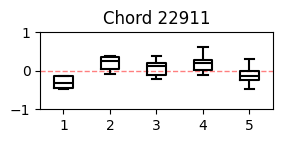

pattern change: 0.75N, t=7.51, p=0.000
chord 29212 change:
     f1: -0.07N, t=-0.51, p=0.628
     f2: 0.38N, t=5.12, p=0.002
     f3: -0.10N, t=-0.95, p=0.378
     f4: 0.22N, t=1.53, p=0.176
     f5: 0.00N, t=0.04, p=0.970


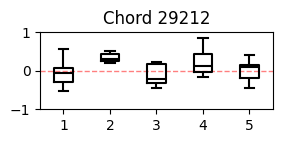

pattern change: 0.72N, t=8.79, p=0.000
chord 91211 change:
     f1: 0.13N, t=1.52, p=0.180
     f2: -0.00N, t=-0.03, p=0.980
     f3: -0.13N, t=-0.83, p=0.439
     f4: 0.21N, t=4.23, p=0.005
     f5: -0.06N, t=-0.37, p=0.725


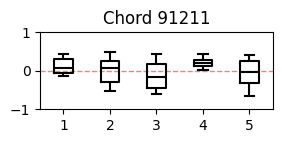

pattern change: 0.78N, t=5.33, p=0.002
chord 92122 change:
     f1: -0.01N, t=-0.12, p=0.912
     f2: -0.05N, t=-0.20, p=0.851
     f3: 0.15N, t=0.99, p=0.361
     f4: -0.11N, t=-0.79, p=0.458
     f5: 0.03N, t=0.34, p=0.747


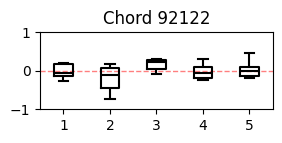

pattern change: 0.96N, t=8.32, p=0.000
chord 12129 change:
     f1: 0.40N, t=2.97, p=0.025
     f2: -0.17N, t=-0.71, p=0.504
     f3: -0.04N, t=-0.26, p=0.803
     f4: -0.16N, t=-1.05, p=0.336
     f5: 0.06N, t=0.54, p=0.606


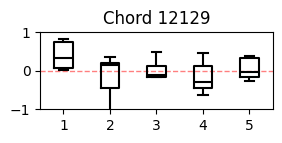

pattern change: 1.00N, t=9.84, p=0.000
chord 12291 change:
     f1: 0.56N, t=4.47, p=0.004
     f2: 0.07N, t=0.30, p=0.778
     f3: 0.22N, t=1.74, p=0.132
     f4: 0.15N, t=1.88, p=0.110
     f5: 0.19N, t=1.46, p=0.195


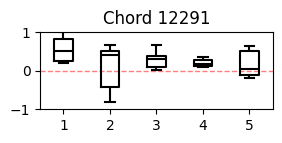

pattern change: 0.95N, t=8.05, p=0.000
chord 19111 change:
     f1: 0.42N, t=4.13, p=0.006
     f2: 0.25N, t=2.56, p=0.043
     f3: 0.07N, t=0.35, p=0.739
     f4: 0.19N, t=1.40, p=0.210
     f5: 0.16N, t=0.81, p=0.448


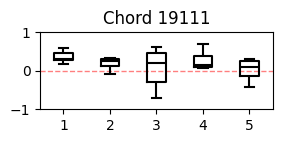

pattern change: 0.83N, t=10.34, p=0.000
chord 21291 change:
     f1: -0.12N, t=-0.73, p=0.490
     f2: 0.05N, t=0.31, p=0.765
     f3: -0.13N, t=-0.72, p=0.498
     f4: 0.19N, t=3.49, p=0.013
     f5: 0.19N, t=1.53, p=0.178


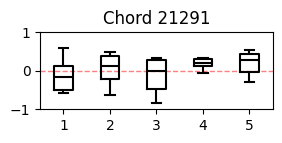

avg f1: 0.13N
avg f2: 0.10N
avg f3: 0.01N
avg f4: 0.11N
avg f5: 0.06N


In [ ]:
D = pd.read_csv('./analysis/efc2_all.csv')
D = D[D.trial_correct==1]

# select trained and day 1 and 5:
D = D[((D.day == 1) | (D.day == 5)) & (D.trained == 1)]
D = D.groupby(['sn', 'day', 'chordID']).agg(
    force1=('force1', 'mean'),
    force2=('force2', 'mean'),
    force3=('force3', 'mean'),
    force4=('force4', 'mean'),
    force5=('force5', 'mean')
).reset_index()

f1_change = []
f2_change = []
f3_change = []
f4_change = []
f5_change = []

chords = D.chordID.unique()
for chord in chords:
    # day = D[D.chordID == chord].day.values
    day1 = (D.chordID == chord) & (D.day == 1)
    day5 = (D.chordID == chord) & (D.day == 5)
    f1 = D.loc[day5, 'force1'].values - D.loc[day1, 'force1'].values
    f2 = D.loc[day5, 'force2'].values - D.loc[day1, 'force2'].values
    f3 = D.loc[day5, 'force3'].values - D.loc[day1, 'force3'].values
    f4 = D.loc[day5, 'force4'].values - D.loc[day1, 'force4'].values
    f5 = D.loc[day5, 'force5'].values - D.loc[day1, 'force5'].values
    f1_change.append(f1.mean())
    f2_change.append(f2.mean())
    f3_change.append(f3.mean())
    f4_change.append(f4.mean())
    f5_change.append(f5.mean())

    AnovaRM

    # ttest:
    t1, p1 = ttest_1samp(f1, 0)
    t2, p2 = ttest_1samp(f2, 0)
    t3, p3 = ttest_1samp(f3, 0)
    t4, p4 = ttest_1samp(f4, 0)
    t5, p5 = ttest_1samp(f5, 0)

    print(f'chord {chord} change:')
    print(f'     f1: {f1.mean():.2f}N, t={t1:.2f}, p={p1:.3f}')
    print(f'     f2: {f2.mean():.2f}N, t={t2:.2f}, p={p2:.3f}')
    print(f'     f3: {f3.mean():.2f}N, t={t3:.2f}, p={p3:.3f}')
    print(f'     f4: {f4.mean():.2f}N, t={t4:.2f}, p={p4:.3f}')
    print(f'     f5: {f5.mean():.2f}N, t={t5:.2f}, p={p5:.3f}')

    forces = np.concatenate((f1, f2, f3, f4, f5), axis=0)
    fingers = np.array([1, 2, 3, 4, 5])
    fingers = np.repeat(fingers, len(f1))

    fig, ax = plt.subplots(1, 1, figsize=(3, 1))
    plt.axhline(y=0, color='r', linestyle='--', linewidth=1, alpha=0.5)
    sns.boxplot(x=fingers, y=forces, ax=ax, width=0.4, fliersize=0, color='k', fill=False)
    plt.ylim((-1, 1))
    plt.title(f'Chord {chord}')
    plt.show()

print(f'avg f1: {np.mean(f1_change):.2f}N')
print(f'avg f2: {np.mean(f2_change):.2f}N')
print(f'avg f3: {np.mean(f3_change):.2f}N')
print(f'avg f4: {np.mean(f4_change):.2f}N')
print(f'avg f5: {np.mean(f5_change):.2f}N')


In [86]:
D = pd.read_csv('./analysis/efc2_all.csv')
D = D[D.trial_correct==1]

# select trained and day 1 and 5:
D = D[((D.day == 1) | (D.day == 5)) & (D.trained == 1)]

sn_list = D.sn.unique()

for sn in sn_list:
    df = D[D.sn == sn]
    chords = df.chordID.unique()
    for chord in chords:
        day1 = (df.chordID == chord) & (df.day == 1)
        day5 = (df.chordID == chord) & (df.day == 5)
        
        t1, p1 = ttest_ind(df.loc[day1, 'force1'].values, df.loc[day5, 'force1'].values)
        t2, p2 = ttest_ind(df.loc[day1, 'force2'].values, df.loc[day5, 'force2'].values)
        t3, p3 = ttest_ind(df.loc[day1, 'force3'].values, df.loc[day5, 'force3'].values)
        t4, p4 = ttest_ind(df.loc[day1, 'force4'].values, df.loc[day5, 'force4'].values)
        t5, p5 = ttest_ind(df.loc[day1, 'force5'].values, df.loc[day5, 'force5'].values)

        mean_diff1 = np.mean(df.loc[day5, 'force1'].values) - np.mean(df.loc[day1, 'force1'].values)
        mean_diff2 = np.mean(df.loc[day5, 'force2'].values) - np.mean(df.loc[day1, 'force2'].values)
        mean_diff3 = np.mean(df.loc[day5, 'force3'].values) - np.mean(df.loc[day1, 'force3'].values)
        mean_diff4 = np.mean(df.loc[day5, 'force4'].values) - np.mean(df.loc[day1, 'force4'].values)
        mean_diff5 = np.mean(df.loc[day5, 'force5'].values) - np.mean(df.loc[day1, 'force5'].values)

        print(f'sn {sn} chord {chord} change:')
        print(f'     f1: diff = {mean_diff1:.2f}, t={t1:.2f}, p={p1:.3f}')
        print(f'     f2: diff = {mean_diff2:.2f}, t={t2:.2f}, p={p2:.3f}')
        print(f'     f3: diff = {mean_diff3:.2f}, t={t3:.2f}, p={p3:.3f}')
        print(f'     f4: diff = {mean_diff4:.2f}, t={t4:.2f}, p={p4:.3f}')
        print(f'     f5: diff = {mean_diff5:.2f}, t={t5:.2f}, p={p5:.3f}')
        print('---')

sn 100 chord 91211 change:
     f1: diff = 0.07, t=-0.84, p=0.405
     f2: diff = -0.38, t=2.97, p=0.004
     f3: diff = 0.30, t=-2.59, p=0.011
     f4: diff = 0.03, t=-0.32, p=0.749
     f5: diff = 0.34, t=-3.43, p=0.001
---
sn 100 chord 92122 change:
     f1: diff = -0.15, t=1.51, p=0.134
     f2: diff = 0.00, t=-0.01, p=0.989
     f3: diff = 0.30, t=-2.67, p=0.009
     f4: diff = -0.05, t=0.48, p=0.632
     f5: diff = -0.15, t=1.47, p=0.144
---
sn 100 chord 29212 change:
     f1: diff = 0.03, t=-0.27, p=0.788
     f2: diff = 0.77, t=-8.29, p=0.000
     f3: diff = -0.40, t=2.74, p=0.008
     f4: diff = -0.08, t=0.81, p=0.419
     f5: diff = -0.20, t=1.52, p=0.134
---
sn 100 chord 22911 change:
     f1: diff = -0.15, t=1.14, p=0.257
     f2: diff = 0.38, t=-2.76, p=0.007
     f3: diff = -0.21, t=1.78, p=0.078
     f4: diff = -0.00, t=0.04, p=0.968
     f5: diff = 0.32, t=-2.59, p=0.011
---
sn 101 chord 22911 change:
     f1: diff = -0.32, t=2.78, p=0.006
     f2: diff = 0.03, t=-0.24,